# Decision Tree for Breast Cancer Survival Prediction (Updated with Categorical Encoding)


This Jupyter notebook trains a decision tree model to classify the survival status (Alive/Dead) of breast cancer patients.
The dataset contains various features of patients, and the output is the survival status. The model uses the Gini impurity criterion,
and accuracy and log loss are tracked over 20 epochs to visualize model performance.

The dataset contains categorical variables, which are encoded using one-hot encoding before training the model.


In [57]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt


In [58]:
data = pd.read_csv('Breast_Cancer.csv')
print("Columns in the dataset before one-hot encoding:", data.columns)

if 'Status' in data.columns:
    data['Status'] = data['Status'].map({'Alive': 1, 'Dead': 0})
else:
    raise KeyError("The 'Status' column is missing from the dataset")

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)  # This converts all categorical columns

if 'Status' not in data.columns:
    raise KeyError("'Status' column is missing after one-hot encoding")

X = data.drop(columns=['Status'])
y = data['Status']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(data.columns)
print(data)

Columns in the dataset before one-hot encoding: Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')
(3219, 29)
(3219,)
Index(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months', 'Status', 'Race_Other', 'Race_White',
       'Marital Status_Married', 'Marital Status_Separated',
       'Marital Status_Single ', 'Marital Status_Widowed', 'T Stage _T2',
       'T Stage _T3', 'T Stage _T4', 'N Stage_N2', 'N Stage_N3',
       '6th Stage_IIB', '6th Stage_IIIA', '6th Stage_IIIB', '6th Stage_IIIC',
       'differentiate_Poorly differentiated', 'differentiate_Undifferentiated',
       'differentiate_Well differentiated', 'Grade_1', 'Grade_2', 'Grade_3',
       'A Stage_Regional', 'Estrogen Status_Positive',
       

In [59]:
epochs = range(1, 21)
accuracy_list = []
loss_list = []

for epoch in epochs:
    # Initialize Decision Tree Classifier with Gini impurity and keeping the max_depth of a node as (epoch*5)
    # You can keep any value as max_depth of the node
    clf = DecisionTreeClassifier(criterion='gini', max_depth=epoch*5, random_state=42)
    
    clf.fit(X_train, y_train)
    
    y_val_pred = clf.predict(X_val)
    y_val_prob = clf.predict_proba(X_val)[:, 1]  
    
    accuracy = accuracy_score(y_val, y_val_pred)
    loss = log_loss(y_val, y_val_prob)
    
    accuracy_list.append(accuracy)
    loss_list.append(loss)

print(accuracy_list)
print(loss_list)

[0.9043478260869565, 0.893167701863354, 0.8732919254658386, 0.8633540372670807, 0.8596273291925466, 0.8596273291925466, 0.8596273291925466, 0.8596273291925466, 0.8596273291925466, 0.8596273291925466, 0.8596273291925466, 0.8596273291925466, 0.8596273291925466, 0.8596273291925466, 0.8596273291925466, 0.8596273291925466, 0.8596273291925466, 0.8596273291925466, 0.8596273291925466, 0.8596273291925466]
[0.39722860634137913, 2.00394494437472, 4.3268710132103, 4.882831125373009, 5.059543891888494, 5.059543891888494, 5.059543891888494, 5.059543891888494, 5.059543891888494, 5.059543891888494, 5.059543891888494, 5.059543891888494, 5.059543891888494, 5.059543891888494, 5.059543891888494, 5.059543891888494, 5.059543891888494, 5.059543891888494, 5.059543891888494, 5.059543891888494]


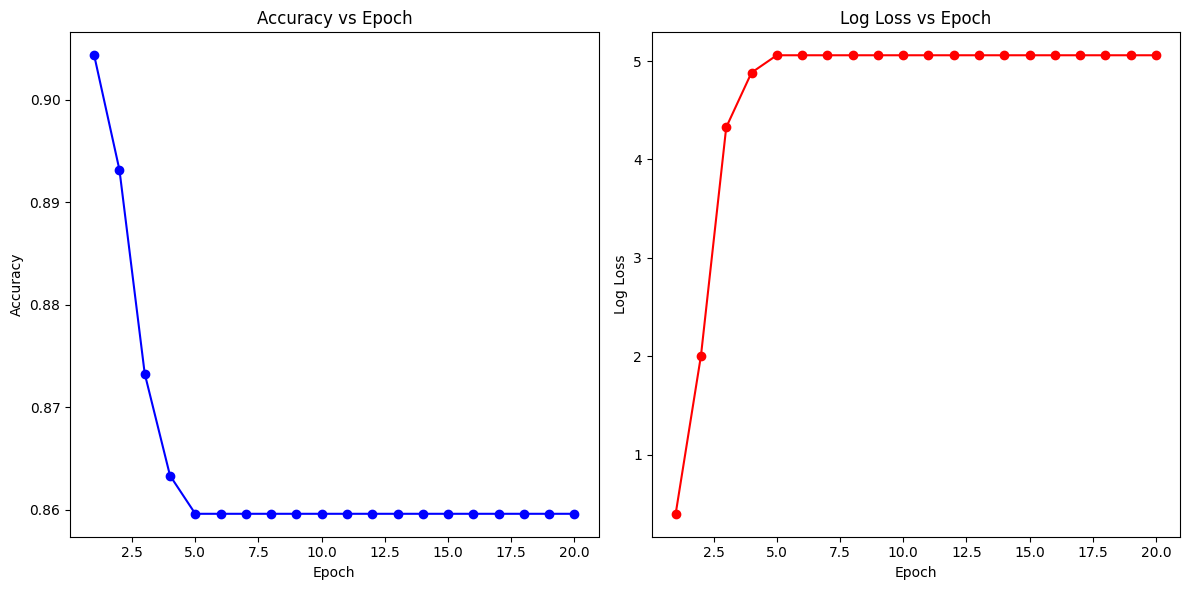

In [60]:
# Plotting Accuracy vs Epoch
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy_list, marker='o', color='b')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plotting Loss vs Epoch
plt.subplot(1, 2, 2)
plt.plot(epochs, loss_list, marker='o', color='r')
plt.title('Log Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')

plt.tight_layout()
plt.show()
